# 18.C21 Problem Set 1 Solutions

## Problem 1 (3+3+3+3+3 points)

**(a)** In the [lecture-1 notes](https://github.com/mitmath/numerical_hub/blob/ed1c2102e103cc07052906c998cc3c0a337f0492/notes/finite-differences.ipynb), we presented the centered-difference approximation (denoted here by $D_{\delta x} f$).
$$
f'(x) \approx \underbrace{\frac{f(x+\delta x) - f(x-\delta x)}{2\delta x}}_{D_{\delta x} f} + O(\delta x^2) \, .
$$
Here, you will derive this approximation a different way: find the unique parabola/quadratic $q(x)$ that goes through the three points $(x, f(x))$ and $(x \pm \delta x, f(x \pm \delta x))$, and then show that the derivative $q'(x)$ at $x$ is **exactly the centered-difference approximation**.

**(b)** In general, suppose that we have $n$ distinct points $(x_k, f(x_k))$ for $k = 1, \ldots, n$.  Show that if you fit this to a degree-$n$ polynomial $p(x) = c_0 + c_1 x + \cdots + c_{n-1} x^{n-1}$, then the derivative $p'(x_1)$ (which we can use as an approximation for $f'(x_1)$) is of the form:
$$
f'(x_1) \approx p'(x_1) = \underbrace{v^T M^{-1}}_{w^T} \begin{pmatrix} f(x_1) \\ \vdots \\ f(x_n) \end{pmatrix}
$$
for some matrix $M$ and some vector $v$.  **What are $M$ and $v$**?  The row vector $w^T = v^T M^{-1}$ gives the *weights* of the finite-difference formula.

**(c)** In some programming language, **implement** your scheme from (b) numerically to compute $w$ for the points $x = [0,1,-1,2,-2]$, and show that you **obtain exactly the fourth-order finite-difference formula** from the lecture-1 notes (plugging in $\delta x = 1$).

**(d)** Suppose that we only compute the function $f(x)$ approximately, with some noise or other errors.  If our approximate function is denoted $\tilde f (x)$, and satisfies $|\tilde f(x) - f(x)| \le \Delta$ for some upper bound $\Delta \ge 0$ on the absolute error, **show** that the centered-difference approximation gains an additional error term proportional to $\Delta$:
$$
\left| D_{\delta x} \tilde f - f'(x) \right| \le a \, \delta x^2 + b \, \Delta + O(\delta x^3) \, ,
$$
assuming $f(x)$ has a Taylor series around $x$.  In particular, **give the exact coefficients** $a$ and $b$ in the above equation in terms of $\delta x$ and/or derivatives of $f(x)$ at $x$ (via the Taylor series).  Ignoring the higher-order $O(\delta x^3)$ terms, **what $\delta x$ minimizes the error bound**?

**(e)** Use the equation of (d) as a simple model of roundoff errors for the example $f(x) = \sin x$ from class, computing the derivative at $x=1$.  Suppose that $\Delta = \epsilon_{\text{machine}} |f(1)|$ (i.e. suppose that the relative error in computing $f(x)$ near $x=1$ is at most machine precision $\epsilon_{\text{machine}} = 2^{-52}$  for [`Float64` precision](https://en.wikipedia.org/wiki/Double-precision_floating-point_format), which might be slightly optimistic).  As in the lecture-1 notes, compute and plot the relative error of the centered-difference approximation versus $\delta x$ on a log–log scale, but also plot your error estimate $a (\delta x)^2 + b \Delta $, divided by $|f'(1)|$ to obtain a relative error estimate, and **compare the two**.

### Solution:

**(a)** We can write the polynomial that goes through three points in various ways — we can solve a 3x3 linear system as in part (b), or we can use the [Lagrange polynomial formula](https://en.wikipedia.org/wiki/Lagrange_polynomial), for example.

Using the latter approach, let's write our polynomial $q$ as $q(y)$ to distinguish the argument from the evaluation point $x$, in which case we have the Lagrange formula:
\begin{align}
q(y) &= f(x-\delta x) \frac{(y-x)(y - x - \delta x)}{2\delta x^2} + f(x)\frac{(y - x + \delta x)(y - x - \delta x)}{-\delta x^2} + f(x+\delta x) \frac{(y-x)(y - x + \delta x)}{2\delta x^2} \\
&= \frac{1}{2\delta x^2} \left[ f(x-\delta x) (y-x)(y - x - \delta x) + 2f(x) ((y - x)^2 - \delta x^2) + f(x+\delta x) (y-x)(y - x + \delta x) \right]
\end{align}
Now, if we evaluate $q'(y)$ at $y = x$, the $f(x)$ term vanishes, along with every term with a $(y-x)$ after the derivative, and we're left with
$$
q'(x) = \frac{1}{2\delta x^2} \left[ f(x-\delta x) (- \delta x) + f(x+\delta x) (\delta x) \right]
$$
which is obviously the centered-difference formula after we factor out $\delta x$.

**(b)** Let's break this into two steps: (1) finding the coefficients $c_0, \ldots, c_{n-1}$; and (2) evaluating the derivative.

For the first step, we want to interpolate $p(x) = c_0 + c_1 x + \cdots + c_{n-1} x^{n-1}$ from the given points $x_1, \ldots, x_n$.  That is, we need to satisfy the equations:
\begin{align}
p(x_1) &= c_0 + c_1 x_1 + \cdots + c_{n-1} x_1^{n-1} = f(x_1) \\
p(x_2) &= c_0 + c_1 x_2 + \cdots + c_{n-1} x_2^{n-1} = f(x_2) \\
\vdots \\
p(x_n) &= c_0 + c_1 x_n + \cdots + c_{n-1} x_n^{n-1} = f(x_n) \, .
\end{align}
But these are $n$ *linear* equations in the $n$ unknowns $c_k$, which we can write in matrix form:
$$
\boxed{\underbrace{\begin{pmatrix} 1 & x_1 & x_1^2 & \cdots & x_1^{n-1} \\
1 & x_2 & x_2^2 & \cdots & x_2^{n-1}
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_n & x_n^2 & \cdots & x_n^{n-1} \end{pmatrix}}_M} \underbrace{\begin{pmatrix} c_0 \\ c_1 \\ \vdots \\ c_{n-1} \end{pmatrix}}_{\vec{c}} =
\underbrace{\begin{pmatrix} f(x_1) \\ f(x_2) \\ \vdots \\ f(x_n) \end{pmatrix}}_{\vec{f}} \, ,
$$
where we have defined the vectors $\vec{c}, \vec{f} \in \mathbb{R}^n$ and the $n \times n$ matrix $M$ (called a [Vandermonde matrix](https://en.wikipedia.org/wiki/Vandermonde_matrix)).  Hence $\vec{c} = M^{-1} \vec{f}$.

Next, given the coefficients $\vec{c}$, how do we evaluate $p'(x_1)$?  By elementary calculus, this is just:
\begin{align}
p'(x_1) &= 0c_0 + c_1 + 2c_2 x_1 + 3c_3 x_1^2 + \cdots + (n-1) c_{n-1} x_1^{n-2} \\
&=  \boxed{\underbrace{\begin{pmatrix} 0 & 1 & 2x_1 & 3 x_1^2 & \cdots & (n-1)  x_1^{n-2} \end{pmatrix}}_{\vec{v}^T}} \underbrace{\begin{pmatrix} c_0 \\ c_1 \\ \vdots \\ c_{n-1} \end{pmatrix}}_{\vec{c}} \, ,
\end{align}
where we have written it as a dot product $\vec{v}^T \vec{c}$, defining the vector $v$.  Putting these together, we have
$$
p'(x_1) = \vec{v}^T \vec{c} = \vec{v}^T M^{-1} \vec{f}
$$
as desired.

**(c)** For the points $x = [0,1,-1,2,-2]$, we can implement this numerically in Julia (for example) to find $w = M^{-T} v$.  First, let's compute $M$:

In [1]:
x = [0,1,-1,2,-2]
M = x .^ (0:4)' # our Vandermonde matrix

5×5 Matrix{Int64}:
 1   0  0   0   0
 1   1  1   1   1
 1  -1  1  -1   1
 1   2  4   8  16
 1  -2  4  -8  16

Second, our vector $v$ simplifies here since $x_1 = 0$:

In [2]:
v = [0, 1, 0, 0, 0]

5-element Vector{Int64}:
 0
 1
 0
 0
 0

Finally, we obtain $w$.  Note that `'` is transposition in Julia, so `M' \ v` computes $(M^T)^{-1} v$:

In [3]:
w = M' \ v

5-element Vector{Float64}:
 -2.220446049250313e-16
  0.6666666666666669
 -0.6666666666666666
 -0.08333333333333333
  0.08333333333333333

Compare this to the fourth-order formula from the notes, for which the weights were:

In [4]:
w_fourth_order = [0, 2, -2, -1/4, 1/4]/3

5-element Vector{Float64}:
  0.0
  0.6666666666666666
 -0.6666666666666666
 -0.08333333333333333
  0.08333333333333333

Clearly, these are the same up to roundoff error (instead of `0.0` for the coefficient of $f(0)$ we are getting something on the order of the machine precision, due to a cancellation error).

**(d)** Here, we are supposing that $\tilde f(x) = f(x) + \epsilon$ where $|\epsilon| \le \Delta$, and there is a *different* error $\epsilon$ for each $x$ (e.g. random noise).  Plugging in the Taylor series $f(x\pm \delta x) = f(x) \pm f'(x) \delta x + f''(x) \delta x^2 / 2 \pm f'''(x) \delta x^3 / 6 + O(\delta x^4)$ similar to class, we will see that the even-order terms cancel and the odd-order terms add, and we are left with:
\begin{align}
D_{\delta x} \tilde f = \frac{\tilde f (x+\delta x) - \tilde f(x - \delta x)}{2\delta x} &= f'(x) + f'''(x) \delta x^2 / 6 + O(\delta x^3) + \frac{\epsilon_1 - \epsilon_1}{2\delta x} \, ,
\end{align}
where $\epsilon_1$ and $\epsilon_2$ were the errors in $\tilde f$ at $x \pm \delta x$, respectively.  An upper bound on the absolute error is therefore:
\begin{align}
\left| D_{\delta x} \tilde f - f'(x) \right| &=  \left| f'''(x) \delta x^2 / 6 + O(\delta x^3) + \frac{\epsilon_1 - \epsilon_1}{2\delta x} \right| \\
&= \boxed{\underbrace{\left|f'''(x)  / 6 \right|}_a} \delta x^2 + \boxed{\underbrace{\frac{1}{|\delta x|}}_b} \Delta + O(\delta x^3) \, 
\end{align}
where we have used the fact that $|A + B| \le |A| + |B|$.  Hence, for example, $|\epsilon_1 - \epsilon_1| \le |\epsilon_1| + |\epsilon_1| \le 2\Delta$.

Thus, we have identified the factors $a$ and $b$.  Ignoring the $O(\delta x^3)$ term, and assuming $\delta x > 0$, the function $a \delta x^2 + \Delta / \delta x$ is minimized when its derivative with respect to $\delta x$ is zero, giving:
$$
0 = 2 a \delta x - \Delta / \delta x^2 \implies \boxed{\delta x = (\Delta / 2a)^{1/3}}.
$$

**(e)** Now we're going to plot this error estimate for $f(x) = \sin x$, $x = 1$, $\Delta = 2^{-52} |\sin 1| = \epsilon_{\text{machine}}$ and $a = |\sin'''(1)/6| = |\cos(1)/6|$, along with the centered-difference approximation.  In Julia, similar to the code from class, we have:

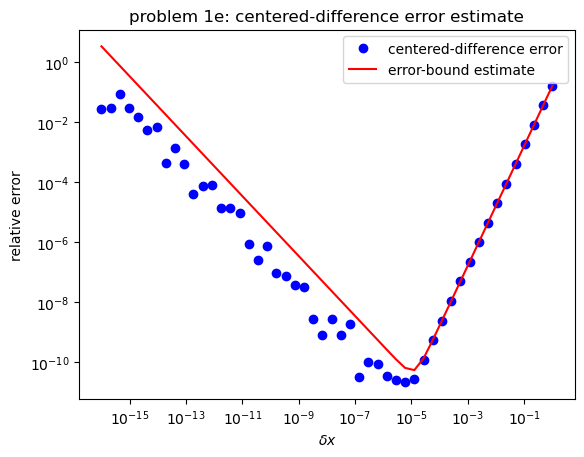

PyObject Text(0.5, 1.0, 'problem 1e: centered-difference error estimate')

In [ ]:
a = abs(cos(1)/6)
Δ = eps(Float64) * abs(sin(1))
δx = 10 .^ range(-16,0,50) # 50 points from 10⁻¹⁶ to 10⁰

using LinearAlgebra
relative_error(approx, exact) = norm(approx - exact) / norm(exact)

errors = @. relative_error( (sin(1+δx) - sin(1-δx))/2δx , cos(1) )

using PyPlot
loglog(δx, errors, "bo")
loglog(δx, @.((a * δx^2 + Δ/δx) / abs(cos(1))), "r-")
legend(["centered-difference error", "error-bound estimate"])
xlabel(L"\delta x")
ylabel("relative error")
title("problem 1(e): centered-difference error estimate")

It looks pretty reasonable for a crude upper-bound estimate (and is nearly exact for the truncation error)!

## Problem 2 (5+5+5 points)

Consider the function $f(x) = \sqrt{1+x} - 1$, for real $x \ge -1$.

**(a)** Explain **why** computing this directly by the obvious formula `sqrt(1+x) - 1` will be **extremely inaccurate** (have a large *relative* error) for small $|x|$.  Give a **numerical example** of an $x$ in which you **lose roughly *half* of the significant digits** in `Float64` precision (i.e. you only get about 8 correct digits), compared to a high-precision answer (for example using 100 decimal digits via `setprecision(BigFloat, 100, base=10); sqrt(1 + big"1e-3") - 1` in Julia or `mpmath.mp.dps = 100; mpmath.sqrt(1 + mpmath.mpf('1e-3')) - 1` in Python with the `mpmath` library).

**(b)** Compute $f(x)$ accurately in `Float64` precision (to at least 14 digits) for the same example $x$ as in (a) by **using the Taylor series** for $f(x)$, implemented in your programming language.

**(c)** **Algebraically re-arrange** the function $f(x)$ into an *equivalent* formula (in exact arithmetic) that **doesn't suffer severe inaccuracy** for small $x$, and **check numerically** that it is indeed accurate (with `Float64` precision).   Hint: try multiplying and dividing $f(x)$ by something that gets rid of the subtraction.  Hint 2: look at the "quadratic roots" example in the [lecture 2 notes](https://github.com/mitmath/numerical_hub/blob/ed1c2102e103cc07052906c998cc3c0a337f0492/notes/Floating-Point-Intro.ipynb).

### Solution:

**(a)** The basic problem here is *catastrophic cancellation* for small $x$: you are subtracting two nearly equal quantities and so most of the significant digits cancel, leaving greatly reduced accuracy.  Indeed, for $|x| < \epsilon_{\text{machine}}$, $1 \oplus x == 1$, so the function yields *zero*: *no* correct digits.   We will see below that for $|x| \ll 1$, the correct answer is roughly $f(x) \approx x/2$. 

Let's try to construct an $x$ so that we have lost about half the digits, i.e. so that the relative error is about $\sqrt{\epsilon_{\text{machine}}}$ compared to a high-precision calculation, or about 7–8 significant digits.  This could be done by trial-and-error, or a computer search, or a plot.  Let's do a plot:

sqrt(eps(Float64)) = 1.4901161193847656e-8


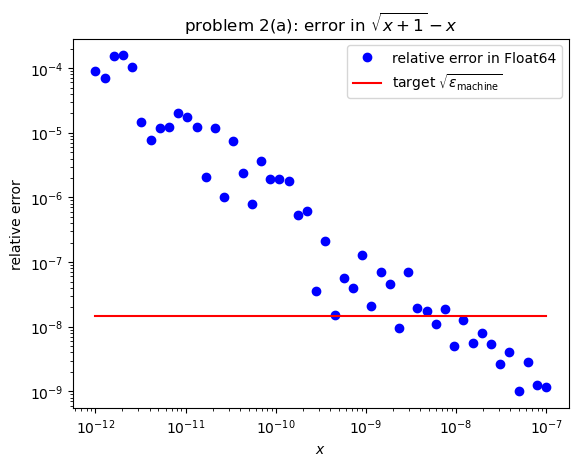

PyObject Text(0.5, 1.0, 'problem 2(a): error in $\\sqrt{x+1} - x$')

In [6]:
f(x) = sqrt(1 + x) - 1

setprecision(100, base=10) # 100-digit BigFloat calculations

relerr(approx, exact) = Float64(abs(approx - exact) / abs(exact))

@show sqrt(eps(Float64)) # our target relative error

xs = 10 .^ range(-7, -12, length=50)
errs = @. relerr(f(xs), f(big(xs)))
loglog(xs, errs, "bo")
loglog(xs, xs.^0 * sqrt(eps(Float64)), "r-")
legend(["relative error in Float64", L"target $\sqrt{\epsilon_{\text{machine}}}$"])
xlabel(L"x")
ylabel("relative error")
title(L"problem 2(a): error in $\sqrt{x+1} - x$")

It's a bit noisy, but you can see that we have lost about half the digits around $\boxed{x \approx 10^{-8}}$.  (Because of the noise, and the vagueness of the problem, you might get something slightly different, but it should be in this ballpark.). Looking explicitly at this x, we see:

In [7]:
x = 1e-8
@show f(x)
@show f(big(x))
@show f(big"1e-8")

f(x) = 4.999999969612645e-9
f(big(x)) = 4.99999998750000016711280323695334928077645054112929097087339003869421543464288329406438220276561328658e-09
f(big"1e-8") = 4.99999998750000006249999960937500273437497949218766113281119079590934753408695221027355193388748091375e-09


4.99999998750000006249999960937500273437497949218766113281119079590934753408695221027355193388748091375e-09

The correct answer for $x = 10^{-8}$ is about $f(10^{-8}) \approx 4.9999999875000000624999996\ldots \times 10^{-9}$.  Compared to that, our `Float64` answer of `4.999999969612645e-9` has about 8 correct decimal digits, as expected.

Note that `f(big(x))` gives a slightly different answer: that's because this *first* rounds `1e-8` to the closest `Float64` value, *then* extends it to a `BigFloat` high-precision value, and *then* evaluates $f$.  So, it made a rounding error in the 16th digit or so *before* evaluating the function.  Still, it avoids the resulting cancellation error, so it is accurate to about 16 decimal digits.

**(b)** It is an elementary calculus exercise to show that the Taylor series for $f(x)$ is
$$
f(x) = \frac{x}{2} - \frac{x^2}{8} + \frac{x^3}{16} - \frac{5x^4}{128} + \frac{7x^5}{256} + O(x^6)
$$
You need not compute this many terms, however.  For $x=10^{-8}$, *just two terms* are needed to compute the correct answer to about 16 decimal digits:

In [8]:
@show x/2 - x^2/8
@show relerr(x/2 - x^2/8, f(big"1e-8"))

x / 2 - x ^ 2 / 8 = 4.9999999875e-9
relerr(x / 2 - x ^ 2 / 8, f(big"1e-8")) = 3.3733397992047934e-17


3.3733397992047934e-17

**(c)**  A trick to get rid of the subtraction analytically is to multiply and divide by $\sqrt{x+1} + 1$, giving:
$$
\left(\sqrt{x+1} - 1 \right) \frac{\sqrt{x+1} + 1}{\sqrt{x+1} + 1} = \frac{(\sqrt{x+1})^2 - 1^2}{\sqrt{x+1} + 1} = \boxed{\frac{x}{\sqrt{x+1} + 1}} \, .
$$
This is very closely analogous to the two forms of the quadratic formula shown in the course notebook.  Implemented this way, we have $x$ in the numerator, which doesn't lose any digits if $x$ is very small, and a *sum* in the denominator (so no cancellation).  We can check that this is indeed quite accurate:

In [9]:
f_better(x) = x / (sqrt(x+1) + 1)

@show f_better(x)
@show relerr(f_better(x), f(big"1e-8"))

f_better(x) = 4.9999999875e-9
relerr(f_better(x), f(big"1e-8")) = 3.3733397992047934e-17


3.3733397992047934e-17

which is indeed accurate to essentially machine precision.  It even works for much smaller $x$, as we can show by a plot:

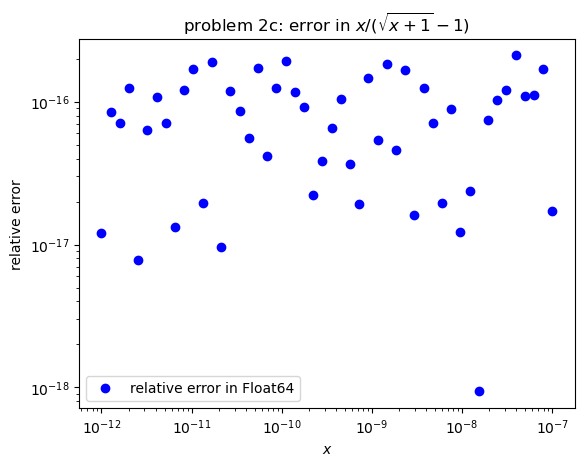

PyObject Text(0.5, 1.0, 'problem 2c: error in $x / (\\sqrt{x+1} - 1)$')

In [ ]:
errs_better = @. relerr(f_better(xs), f(big(xs)))
loglog(xs, errs_better, "bo")
legend(["relative error in Float64"])
xlabel(L"x")
ylabel("relative error")
title(L"problem 2(c): error in $x / (\sqrt{x+1} - 1)$")

## Problem 3 (3+5+5 points)

The [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) $\sigma$ of a sequence $x_1, x_2, \ldots, x_n$ ($n > 1$) can be calculated by first computing the [sample mean](https://en.wikipedia.org/wiki/Sample_mean_and_covariance) (the "average") $\mu = \frac{1}{n} \sum_k x_k$ followed by computing:
$$
\sigma = \sqrt{\frac{1}{n-1} \sum_{k=1}^n (x_k - \mu)^2} \, ,
$$
where dividing by $n-1$ instead of $n$ is [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction).

This can be implemented straightforwardly in Julia as:
```jl
function my_std(x)
    n = length(x)
    μ = sum(x) / n
    return sqrt(sum((x .- μ).^2) / (n - 1))
end
```
Or in Python (via NumPy) as:
```py
import numpy as np
def my_std(x):
    x = np.asarray(x)
    n = x.size
    μ = np.sum(x) / n
    return np.sqrt(np.sum((x - μ)**2) / (n - 1))
```

**(a)** Compute, by hand, **the *exact* answer** for $\sigma$ with the $n=2$ sequence $x = [10^{300}, -10^{300}]$.

**(b)** **Compare to the straightforward implementation** of the above formulas (above, or its analogue in another language) in `Float64` precision using `x = [1e300, -1e300]`.  Also **compare to a "standard" library** in your programming language, e.g. `std(x)` in the Julia [Statistics.jl](https://github.com/JuliaStats/Statistics.jl) package or `numpy.std(x, ddof=1)` in Numpy.  **Also try** $x = [10^{-300}, -10^{-300}]$.  **Explain how and why these results differ from the exact result.**

**(c)** **Implement an improved** `std_corrected(x)` function in your programming language that doesn't suffer the problems you identified above when the elements of $x$ are very large or very small (it should also work when the elements are all zero).  Hint: try multiplying and dividing by a scale factor.

### Solution:

**(a)** The exact mean is $\mu = 0$, so the standard deviation is
$$
\sigma = \sqrt{\frac{1}{1} \left( (10^{300})^2 + (-10^{300})^2  \right)} = \boxed{10^{300} \sqrt{2}} \, .
$$

**(b)** If we try to do this straightforwardly in the default `Float64` precision, however, we get:

In [11]:
function my_std(x)
    n = length(x)
    μ = sum(x) / n
    return sqrt(sum((x .- μ).^2) / (n - 1))
end

@show x = [1e300, -1e300]   # input is fine: this is within the representable Float64 range
@show my_std(x)

x = [1.0e300, -1.0e300] = [1.0e300, -1.0e300]
my_std(x) = Inf


Inf

We got `Inf`, or floating-point infinity!

The problem is that the $(x_k - \mu)^2$ terms, which would be $10^{600}$ in exact arithmetic, **overflowed** the maximum representable floating-point value, and hence were replaced by `Inf`.

In fact, the same problem afflicts the `std(x)` function in the statistics libraries of Julia (Statistics.jl), Python (Numpy and Scipy), Matlab, GNU Octave, and R!   Arguably, [this is a bug in those libraries](https://github.com/JuliaStats/Statistics.jl/issues/195): the *correct* output from part (a) is in the representable range, so it is incorrect for them to overflow because of intermediate steps.

A similar problem occurs for `[1e-300, -1e-300]`, where the exact answer would be $10^{-300} \sqrt{2}$:

In [12]:
@show x_small = [1e-300, -1e-300]   # input is fine: this is within the representable Float64 range
@show my_std(x_small)

x_small = [1.0e-300, -1.0e-300] = [1.0e-300, -1.0e-300]
my_std(x_small) = 0.0


0.0

In this case, the $(x_k - \mu)^2$ terms, which would be $10^{-600}$ in exact arithmetic, **underflowed** the minimum representable nonzero floating-point magnitude, and hence were replaced by `0.0`.

**(c)** One possible trick is to just rescale the intermediate steps to remove the overflow, and then rescale the output.  That is,
$$
\sigma = \boxed{ |s| \sqrt{\frac{1}{n-1} \sum_{k=1}^n \left(\frac{x_k - \mu}{s}\right)^2} } \, ,
$$
where $s$ is the scale factor.  A good choice of scale factor is simply the maximum magnitude:
$$
\boxed{s = \max_k |x_k - \mu| } \, .
$$
This gets rid of *both underflow and overflow* in $(x_k - \mu)^2$, because it makes the maximum term `1.0`.  There could still be underflow for the *minimum* term, but that doesn't matter because we are adding it to `1.0`.

Of course, we also have to check whether $s = 0$ and return $\sigma = 0$ in that case, to avoid dividing by zero.

Let's implement it and check:

In [13]:
function better_std(x)
    n = length(x)
    μ = sum(x) / n
    s = maximum(x -> abs(x - μ), x)
    s == 0 && return float(s) # check for s=0 case
    return s * sqrt(sum(((x .- μ)./s).^2) / (n - 1))
end

@show better_std([1e300, -1e300])
@show better_std([1e-300, -1e-300])
@show better_std([0, 0])

better_std([1.0e300, -1.0e300]) = 1.4142135623730952e300
better_std([1.0e-300, -1.0e-300]) = 1.4142135623730952e-300
better_std([0, 0]) = 0.0


0.0

As we can see, we got the correct answer in both the large and small extremes (recalling that $\sqrt{2} \approx 1.41421356237309504880\ldots$).

## Problem 4 (5+5+5 points)

In lecture 3, we found that piecewise linear interpolation of a function $f(x)$ sampled on a uniform grid $x_k = k \Delta x$ with spacing $\Delta x$ converges to $f$ with second-order accuracy, i.e. an *absolute* (not necessarily relative) error that is $O(\Delta x^2)$.

In Julia, you can use (e.g.) the [Interpolations.jl package](https://github.com/JuliaMath/Interpolations.jl) to do the interpolation for you.  Given a vector `x` of sample points (sorted in ascending order) and a function $f(x)$, you can create the corresponding piecewise-linear interpolation function `f_interp(x)` with:
```jl
using Interpolations
f_interp = linear_interpolation(x, f.(x)) 
```
You can then apply it to any point `xnew` with `f_interp(xnew)`, or to a vector `xnew` of points with `f_interp.(xnew)`.  In Python [with NumPy](https://numpy.org/doc/stable/reference/generated/numpy.interp.html), to do piecewise linear interpolation from a vector of points `x` to a vector of points `xnew`, given a vector `fx` of the function values at `x`, you can do `numpy.interp(xnew, x, fx)`.

**(a)** Consider the function $f(x) = |\sin x|$ evaluated on $x \in [0,4]$.  Similar to class, apply piecewise-linear interpolation from $n+1$ equally spaced points on $[0,4]$ (`x = range(0,4,length=n+1)` in Julia or `numpy.linspace(0,4,n+1)` in Python), i.e. $\Delta x = 4/n$, and compare your interpolant $I_n(x)$ to the exact function at $10^6$ equally spaced points.  On a log-log plot, show the **maximum absolute error** $\max_x |I_n(x) - f(x)|$ as a function of $n$ (ranging from $10$ to $10^5$).  Does it converge as $O(\Delta x^2)$?  **Determine and explain the order of convergence.**

**(b)** Does your answer change if you look at the [root-mean-square](https://en.wikipedia.org/wiki/Root_mean_square) error?  Why or why not?  **Determine and explain the order of convergence.**

**(c)** Propose, implement, and check a simple modification to your sample grid `x`, making it somewhat nonuniform, so that you recover $O(1/n^2)$ convergence of the maximum error.

### Solution:

Here are the plots for parts (a) and (b).  We used the Interpolations.jl library for piecewise-linear interpolation.

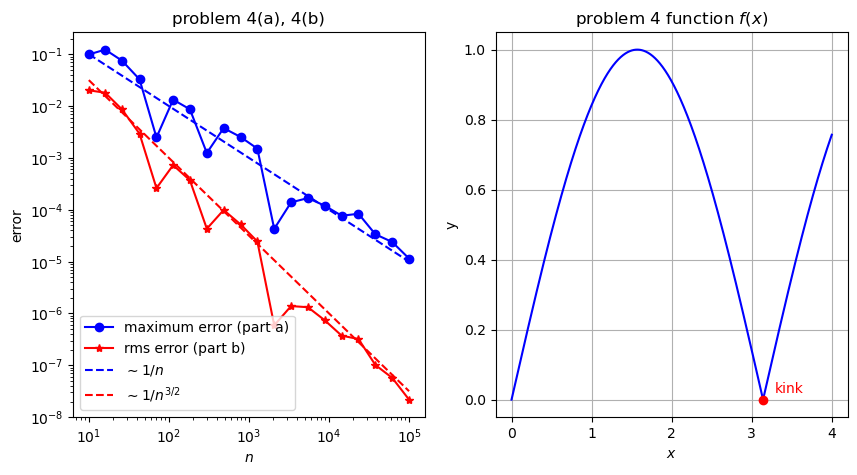

In [14]:
using Interpolations, PyPlot
f(x) = abs(sin(x))
ns = round.(Int, 10 .^ range(1,5,length=20))
xfine = range(0,4,length=10^6)
errs = map(ns) do n
    x = range(0,4,length=n+1)
    f_interp = linear_interpolation(x, f.(x))
    err = f.(xfine) .- f_interp.(xfine)
    maxerr = maximum(abs, err)
    rmserr = sqrt(sum(abs2, err) / length(xfine))
    maxerr, rmserr
end

figure(figsize=(10,5))

subplot(1,2,1)
title("problem 4(a), 4(b)")
xlabel(L"n")
ylabel("error")
loglog(ns, first.(errs), "bo-")
loglog(ns, last.(errs), "r*-")
loglog(ns, 1 ./ ns.^1, "b--")
loglog(ns, 1 ./ ns.^1.5, "r--")
legend(["maximum error (part a)", "rms error (part b)", L"\sim 1/n", L"\sim 1/n^{3/2}"])

subplot(1,2,2)
title(L"problem 4 function $f(x)$")
xlabel(L"x")
ylabel("y")
plot(xfine, f.(xfine), "b-")
plot([1pi], [0], "ro")
text(1pi + 0.15, 0.02, "kink", color="red")
grid()


**(a)** The problem here is that the derivation of the $O(\Delta x^2)$ error bound **assumed twice-differentiability**, and in fact was proportional to the second derivative $f''$, but *this function has a discontinuous derivative*.  It **has a "kink"** whenever $\sin x$ passes through zero, due to the absolute value, which in this example occurs only at $x=\pi$ in the interval $[0,4]$.  (There is also a zero at the left endpoint, but no kink because we don't go past it to negative $x$.)

Interpolation is still exact at the interpolation points, and the slope of this function (while discontinuous) is still bounded (we say that the function is [Lipshitz continuous](https://en.wikipedia.org/wiki/Lipschitz_continuity)).  In fact, $|f'(x)| \le 1$ everywhere (technically, the "Lipshitz constant" is 1).  So, the over an interval $\Delta x$, the most that the function $f(x)$ can deviate from the interpolant is proportional to the maximum |slope| multiplied by $\Delta x$, i.e. the **maximum error** is $\boxed{O(\Delta x)}$, which is precisely what we see in the plot above.

**(b)** The rms error is different because the error over *most* intervals (which don't contain the kink) have $O(\Delta x^2)$ convergence — only a *single* interval has the $O(\Delta x)$ error.

That is, the mean *squared* error is $O(\Delta x^4)$ over $n-1$ intervals and $O(\Delta x^2)$ over 1 interval.  When you average these and take the square root you get:
$$
\text{rms error} \sim \sqrt{ \frac{n O(\Delta x^4) +  O(\Delta x^2)}{n}} \sqrt{O(\Delta x^4) +  O(\Delta x^3)} = \boxed{O(\Delta x^{3/2})}
$$
since $n \sim \Delta x^{-1}$.   And this $3/2$ power law is exactly what we see in the plot!

**(c)** The trick is that we only have a problem if we have a kink in the *interior* of an interval, not at the *endpoints*,
since the endpoints are always exact.   So a simple solution is to **include a single additional interpolation point exactly at the kink** $x=\pi$.

Below is an implementation of the solution for part (c), in which we put an additional interpolation point exactly at the root $x = \pi$.

As expected, we now recover $O(\Delta x^2)$ convergence of the maximum error (and hence also rms error).

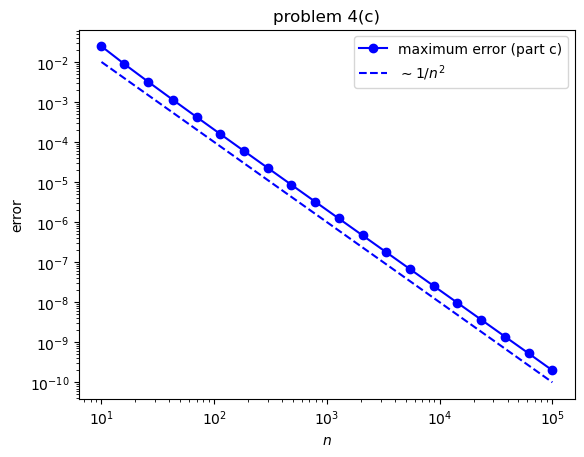

PyObject <matplotlib.legend.Legend object at 0x343c057b0>

In [15]:
maxerrs = map(ns) do n
    x = sort!([π; range(0,4,length=n)]) # prepend π and sort
    f_interp = linear_interpolation(x, f.(x))
    err = f.(xfine) .- f_interp.(xfine)
    maximum(abs, err)
end
title("problem 4(c)")
xlabel(L"n")
ylabel("error")
loglog(ns, maxerrs, "bo-")
loglog(ns, 1 ./ ns.^2, "b--")
legend(["maximum error (part c)", L"\sim 1/n^2"])